In [1]:
import arff, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [2]:
df_desharnais = pd.read_csv('02.desharnais.csv',  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [6]:
features = [ 'TeamExp', 'ManagerExp', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[features]
Y = df_desharnais['Effort']

# desharnais n_estimator=500 and max_features= 1 to 8

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [14]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,9):   
    clf= RandomForestRegressor(n_estimators=500,max_features=i)
    clf.fit(X_train, y_train)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [15]:
MMRE_list

[0.8707912597290569,
 0.8218141247054527,
 0.8224633188119518,
 0.8226773954642898,
 0.8407062270572473,
 0.8200592590534703,
 0.8177500257947403,
 0.8075056232034141]

In [16]:
MdMRE_list

[0.36037788018433187,
 0.32915028901734106,
 0.32202629272567923,
 0.3451160220994475,
 0.35110023677979485,
 0.3865177584846094,
 0.40638042620363063,
 0.44854460532461465]

In [17]:
Pred_list

[44.0, 40.0, 32.0, 32.0, 32.0, 36.0, 32.0, 40.0]

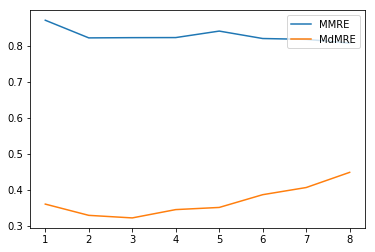

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,9)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

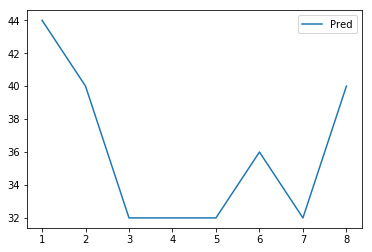

In [20]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# desharnais n_estimator=100 to 1000 and max_features= 5


In [25]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=5)
    clf.fit(X_train, y_train)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [26]:
MMRE_list

[0.8192665490450373,
 0.8045331070974173,
 0.8244020777646409,
 0.8200590787501639,
 0.8250666929871268,
 0.8277497878343223,
 0.8189794478735873,
 0.8222039109439456,
 0.8159678037048509,
 0.8117648792535843]

In [27]:
MdMRE_list

[0.39011973575557385,
 0.3525887924230466,
 0.3848224151539068,
 0.38326164167324384,
 0.3622036306235202,
 0.3229597474348856,
 0.3967820498365091,
 0.3389058800315706,
 0.33228799438744183,
 0.35022809786898185]

In [28]:
Pred_list

[28.000000000000004,
 28.000000000000004,
 28.000000000000004,
 28.000000000000004,
 32.0,
 32.0,
 32.0,
 32.0,
 28.000000000000004,
 32.0]

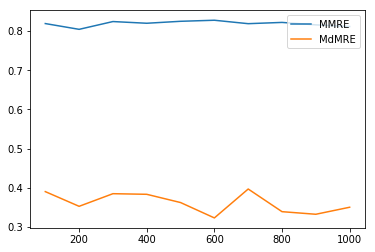

In [29]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

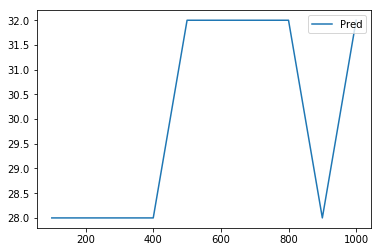

In [30]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# GridSearchCV

In [32]:
params_grd={
 'max_features': [1,2,3,4,5,6,7,8],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [33]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, y_train)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.7min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
print(MMRE)
print(MdMRE)
print(Pred)

0.8999680208531706
0.3617150233587412
40.0


In [35]:
grd_search.best_params_

{'max_features': 1, 'n_estimators': 400}


# Random Hyperparameter Grid

In [46]:
Random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1,2,3,4,5,6,7,8],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [47]:
clf= RandomForestRegressor()
random_grd_search=RandomizedSearchCV(estimator = clf, param_distributions = Random_grid, n_iter = 100, cv = 10, 
                              verbose=2, random_state=42, n_jobs = -1)
random_grd_search.fit(X_train, y_train)
best_grid = random_grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
print(MMRE)
print(MdMRE)
print(Pred)

0.9510923428733002
0.3615783755539389
36.0


In [49]:
random_grd_search.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 1,
 'max_depth': 30,
 'bootstrap': True}

#  Regression Tree Analysis

In [44]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

In [45]:
print(MMRE)
print(MdMRE)
print(Pred)

0.8774700686993111
0.5049426020408163
36.0
